# Objetivo del Estudio
El objetivo de este dataset sería predecir la variable FEV en base a las demás variables del dataset.


# Curiosidad:
Observar cual es la variable qué mas influye en el fev de una persona.

In [ ]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#import ydata_profiling
#Se agregarán más en cuanto avance el temario de clase

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Contexto de las Variables del Dataset
#Variables Numéricas

seqnbr: Número de secuencia o identificación única de cada registro en el dataset. Este número se utiliza para identificar de manera única cada dato en el conjunto de datos.

subjid: Identificación o código del sujeto o participante del estudio. Cada sujeto o participante tiene un código único asociado a sus mediciones de FEV y otras variables.

age: Edad del sujeto o participante en años. Esta variable indica la edad del individuo en el momento en que se registró el dato de FEV.

fev: Valor del FEV (Forced Expiratory Volume) registrado para el sujeto o participante. El FEV es una medida de la cantidad de aire que una persona puede exhalar durante una espiración forzada en un segundo. Es una medida importante en la evaluación de la función pulmonar.

height: Altura del sujeto o participante en centímetros. Esta variable indica la altura del individuo en el momento en que se registró el dato de FEV. La altura puede ser un factor influyente en la capacidad pulmonar.

#Variables Categóricas

sex: Género o sexo del sujeto o participante. Esta variable indica el sexo del individuo y puede tener dos valores, como "M" para masculino y "F" para femenino.

smoke: Variable que indica si el sujeto o participante es fumador o no. Puede tener dos valores, como "Yes" o "No", que indican si el individuo fuma o no.

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/FEV/FEV_data.csv")
df.head()

,seqnbr,subjid,age,fev,height,sex,smoke
0,1,301,9,1.708,57.0,2,2
1,2,451,8,1.724,67.5,2,2
2,3,501,7,1.720,54.5,2,2
3,4,642,9,1.558,53.0,1,2
4,5,901,9,1.895,57.0,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


In [ ]:
df.nunique()

seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

In [ ]:
to_category = list(df.loc[:, df.nunique() < 3])
df[to_category] = df[to_category].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


In [ ]:
df.describe()

,seqnbr,subjid,age,fev,height
count,654.00000,654.000000,654.000000,654.000000,654.000000
mean,327.50000,37169.571865,9.931193,2.636780,61.143578
std,188.93782,23690.860350,2.953935,0.867059,5.703513
min,1.00000,201.000000,3.000000,0.791000,46.000000
25%,164.25000,15811.000000,8.000000,1.981000,57.000000
50%,327.50000,36071.000000,10.000000,2.547500,61.500000
75%,490.75000,53638.500000,12.000000,3.118500,65.500000
max,654.00000,90001.000000,19.000000,5.793000,74.000000


In [ ]:
df.sort_values(by='age').head()

,seqnbr,subjid,age,fev,height,sex,smoke
25,26,5642,3,1.404,51.5,1,2
221,222,50951,3,1.072,46.0,2,2
298,299,80841,4,1.004,48.0,1,2
22,23,5152,4,0.839,48.0,2,2
63,64,14252,4,1.577,49.0,2,2


In [ ]:
df.describe(exclude=np.number)

,sex,smoke
count,654,654
unique,2,2
top,1,2
freq,336,589


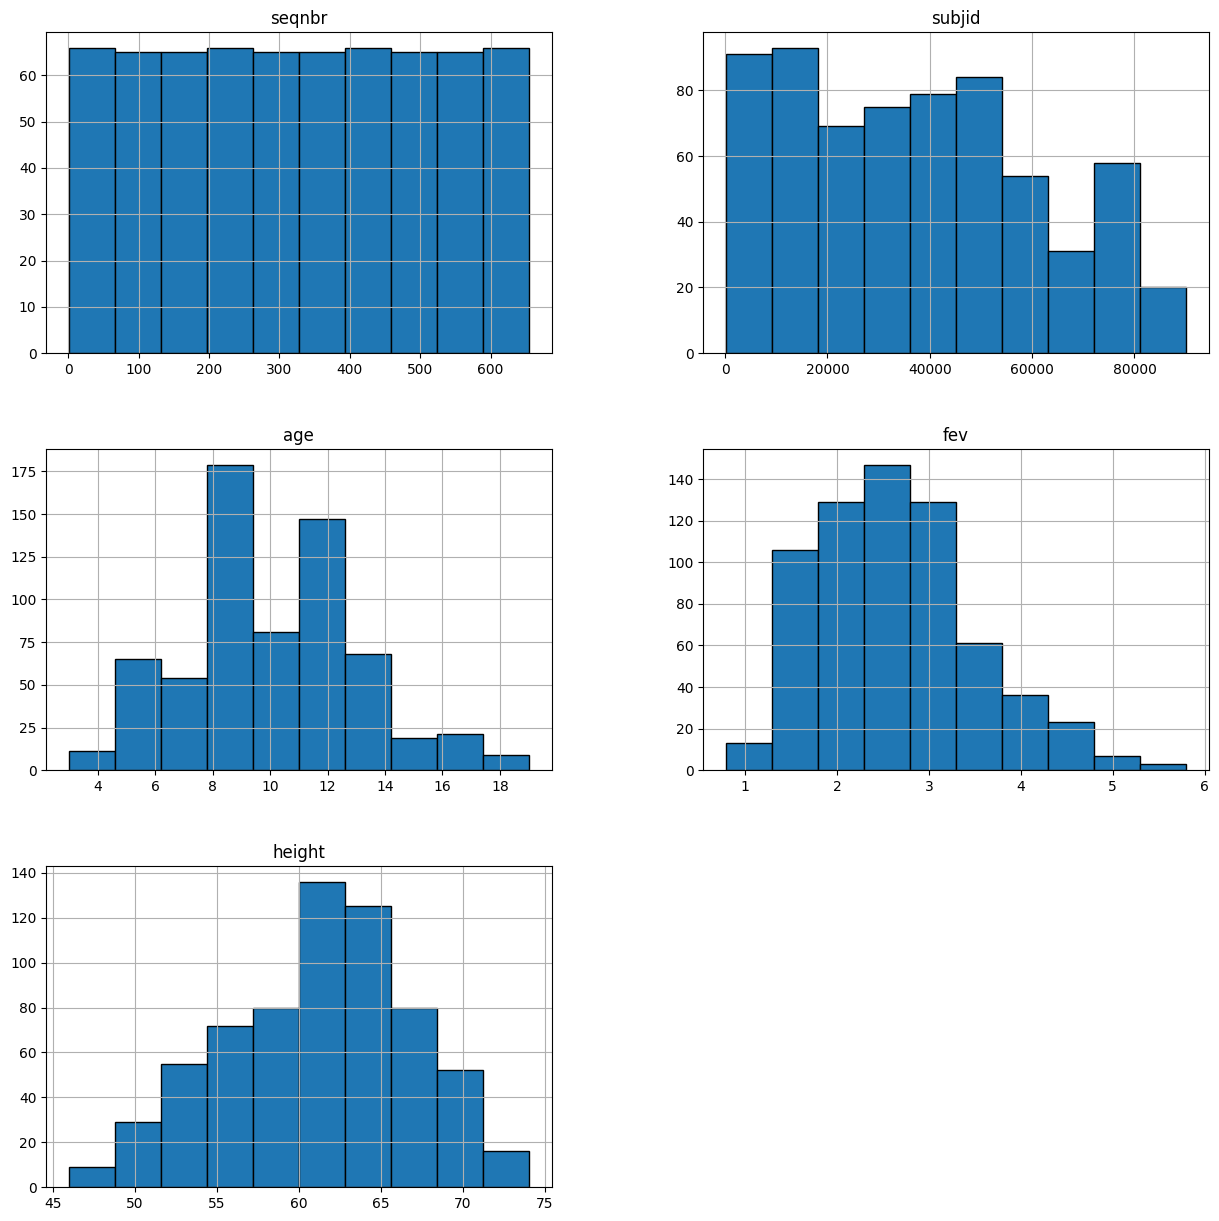

In [ ]:
df.hist(edgecolor='black',figsize=(15,15))
plt.show()

#Interpretación de los gráficos

#gráfica de edad vs género
Las gráficas de edad para ambos grupos siguen una distribución muy parecida a la normal. Ambas distribuciones son similares, con una moda muy parecida, solo que con menos freciencia en el grupo de mujeres, debido a que tiene  menos registros que los hombres.

#gráfica de FEV vs género
Las gráficas de FEV nos dice que los hombres de la muestra tienen una mayor capacidad pulmonar que las mujeres, podemos saber esto con certeza, ya que, en la distribución de edad las gráficas de hombres vs mujeres erán prácticamente idénticas.
Podemos ver que la asimetría es centrar para  ambas distribuciones, solo que para los hombres, la capacidad pulmonar tiende a crecer más.

#gráfica de tamaño vs género
La gráfica de las mujeres tiene una  distribución parecida a la normal. Con una moda definida, mientras que los hombres tiene una distribución con más variación en la variable de tamaño. Debido a que la distribución de edades era similar, viendo este gráfico podemos decir  que los hombres/niños de esta muestra son más altos que las niñas/mujeres de la muestra.



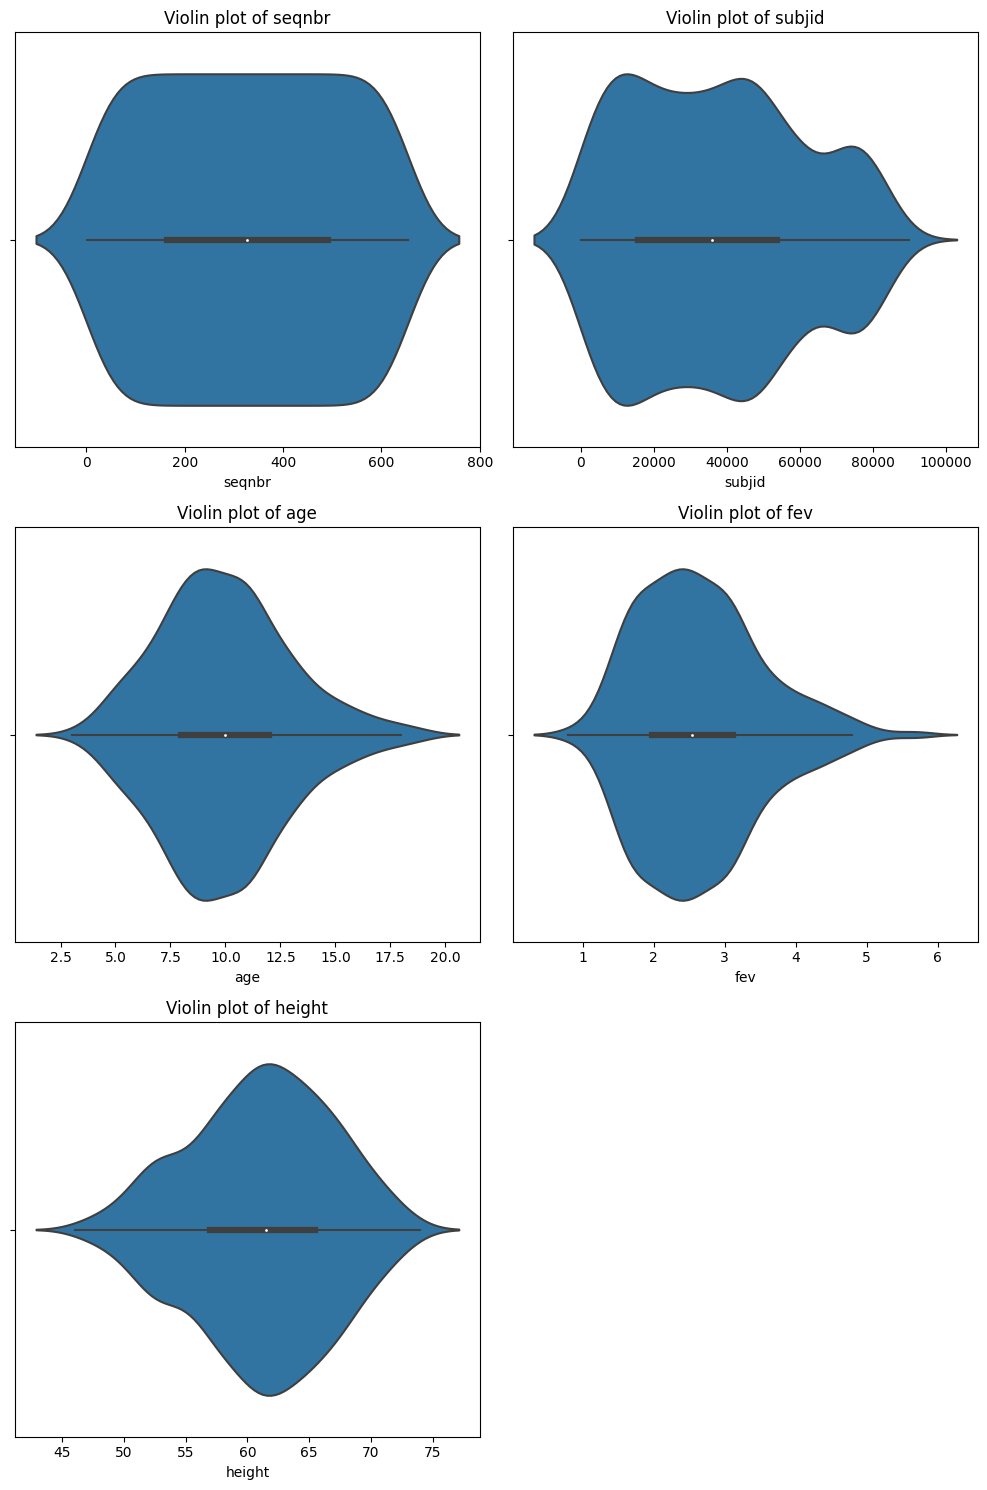

In [ ]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=df[column])
    plt.title(f'Violin plot of {column}')



plt.tight_layout()
plt.show()

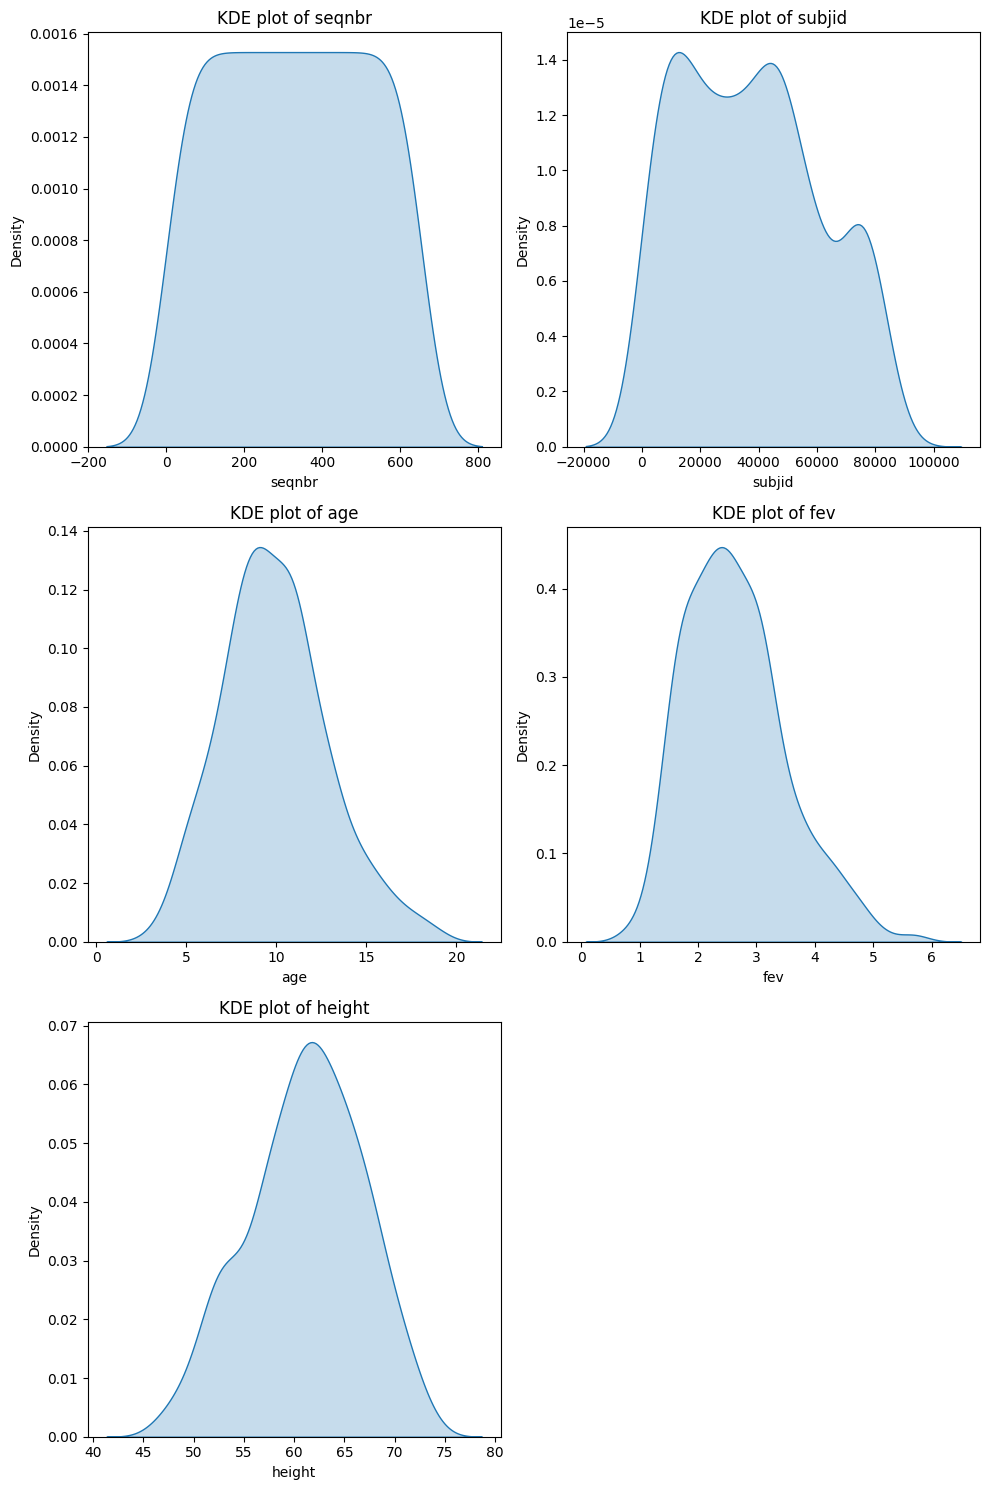

In [ ]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')



plt.tight_layout()
plt.show()

# Analisis de las distribuciones

La variable de edad tiene una distribucion parecida a la normal, un poco sesgada a la derecha.

La variablde de height, también sigue una distribución parecida a la normal.

El fev tiene una distribución también parecida a la normal solo que sesgada un poco hacia la izquierda.

<Axes: xlabel='smoke', ylabel='fev'>

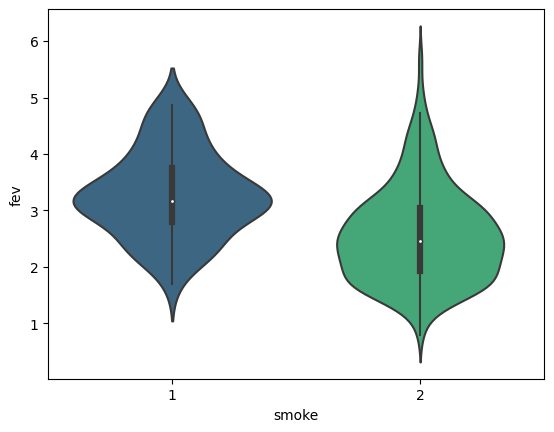

In [ ]:
sns.violinplot(x='smoke',y='fev',data=df,palette='viridis')

Los niños fumadores por media parecen tener mayor valor de fev que los no fumadores, lo cual es sorprendente. No obstante, la lógica permite asumir que los que fuman tendrá una media en sui edad y por ende altura alta y como se identificó antes, a mayor altura mayor fev.

In [ ]:
df.sex.value_counts()

1    336
2    318
Name: sex, dtype: int64

In [ ]:
dfa = df.loc[(df['sex'] == 1)]
dfb = df.loc[(df['sex'] == 2)]
print(dfa['age'].skew())
dfb['age'].skew()


0.43187404155906167


0.393637622154096

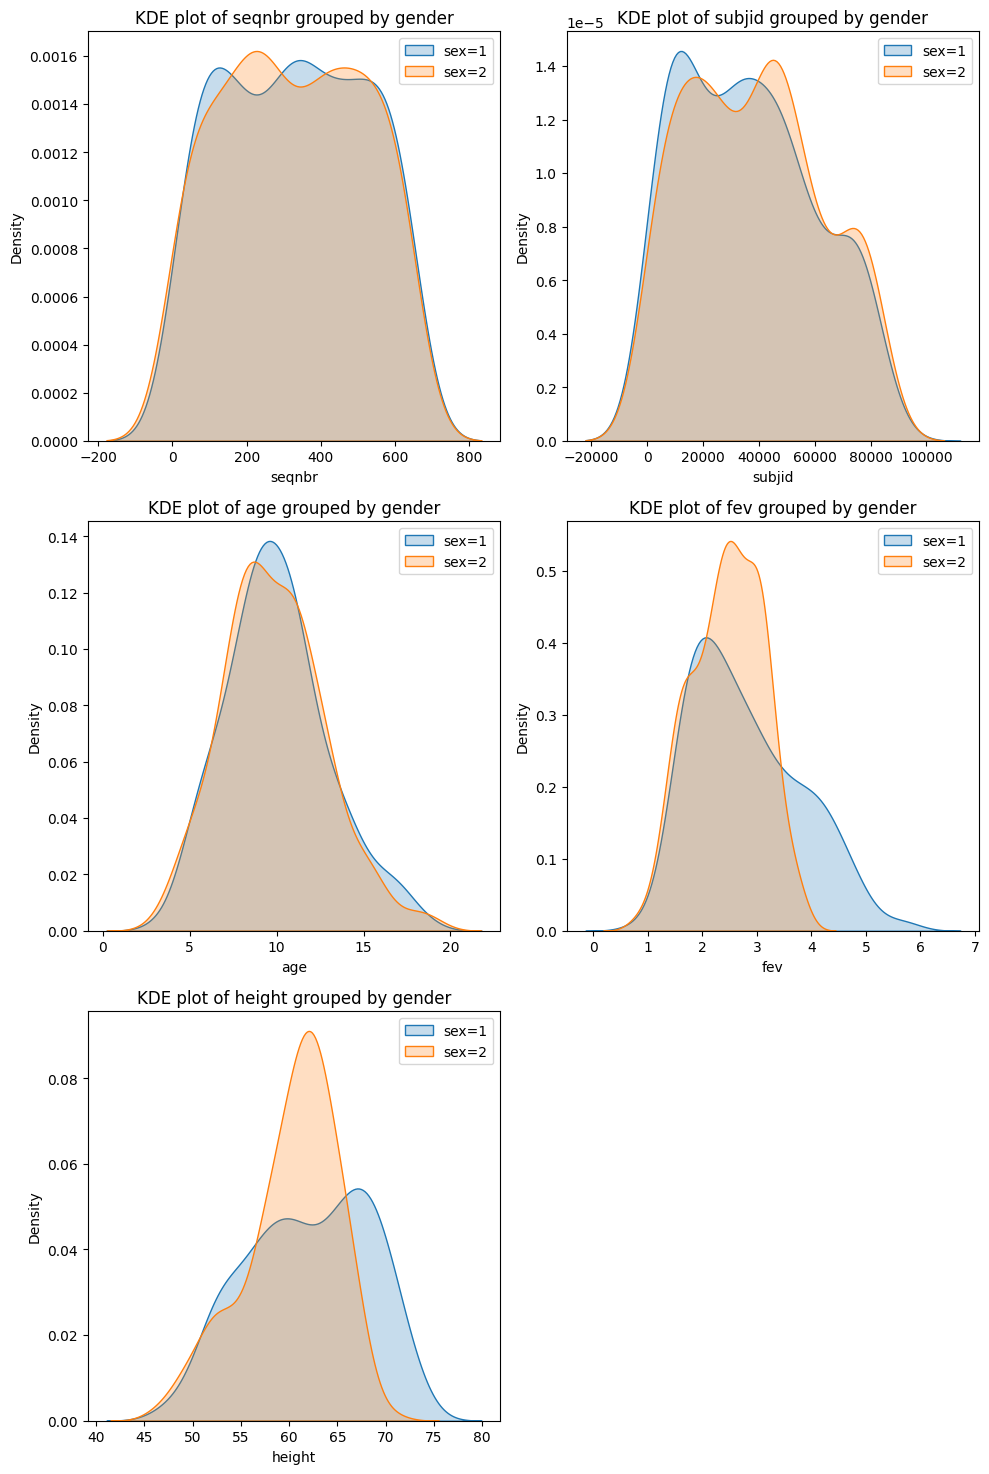

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['sex']==1][column], label='sex=1', fill=True)
    sns.kdeplot(data=df[df['sex']==2][column], label='sex=2', fill=True)
    plt.title(f'KDE plot of {column} grouped by gender')
    plt.legend()



plt.tight_layout()
plt.show()

# Estudio Bivariante

#Edad vs Género:
La edad de hombres y mujeres sigue un patrón de distribución parecido a una campana de Gauss. Sin embargo, se observan algunas diferencias entre ambos géneros. En el caso de los hombres, la moda está bien definida, mientras que en el caso de las mujeres, hay dos puntos máximos, lo que indica una moda menos definida.

#FEV vs Género:
El FEV en hombres muestra una mayor distribución en la cola derecha en comparación con las mujeres. Esto sugiere que en general, los hombres tienden a tener valores más altos de FEV que las mujeres. Además, la distribución de los datos en las mujeres es más uniforme y está más centrada, mientras que en los hombres, la distribución está más extendida y asimétrica hacia la derecha.

#Tamaño vs Género:
Se repite un patrón similar al de la gráfica anterior. En la distribución de tamaños de las mujeres, los valores están más centrados y agrupados, lo que indica menos variación. Por otro lado, en la distribución de tamaños de los hombres, se encuentra una mayor variación en los datos y una asimetría hacia la derecha. En la distribución de hombres, también se puede identificar una moda bien definida, que representa un valor más frecuente en la muestra.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

<ipython-input-19-f601aa721883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,seqnbr,subjid,age,fev,height
seqnbr,1.000,0.406,0.783,0.616,0.632
subjid,0.406,1.000,-0.011,-0.015,-0.032
age,0.783,-0.011,1.000,0.756,0.792
fev,0.616,-0.015,0.756,1.000,0.868
height,0.632,-0.032,0.792,0.868,1.000


La variable objetivo fev está fuertemente correlacionada con la edad y la altura de las personas.

In [ ]:
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer


tablaCramer = pd.DataFrame(df.apply(lambda x: cramers_v(x,df['fev'])),columns=['VCramer'])
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente al FEV').update_yaxes(categoryorder="total ascending")

La variable del sexo tambien tiene un efecto significante con respecto a la variable objetivo continua.

# Aplicación de La Regresión Lineal

In [ ]:

import statsmodels.api as sm

X = df[['height', 'age','sex']]
y = df['fev']

# Agregar una constante a X para estimar el término de intercepción
X = sm.add_constant(X)

# Crear un modelo de regresión lineal
model = sm.OLS(y, X)
# Ajustar el modelo a los datos
results = model.fit()
# Generar el resumen de la regresión
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     744.6
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          9.05e-210
Time:                        04:30:06   Log-Likelihood:                -346.99
No. Observations:                 654   AIC:                             702.0
Df Residuals:                     650   BIC:                             719.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1263      0.242    -17.058      0.0

# Interpretación de la regresión Lineal
Se obtuvo un coeficiente de Determinación arriba de 0.75, por lo que se puede decir que es un modelo aceptable.

El fev aumenta en 0.1046 unidades por cada aumento en un centímetro en la estatura del individuo.

El fev aumenta en 0.0614 unidades por cada año del individuo. Esto debe ser ya que la edad tiene alta correlación con la estatura y más en este estudio que se esta trabajando con niños y adolescentes.

El fev disminuye en 0.1611 unidades en caso de ser mujer, también debe ser debido a que en esta muestra las mujeres erán más pequeñas que los hombres.

Todas las variables son significantes ya que se obtuvieron p valores menores que 0.05


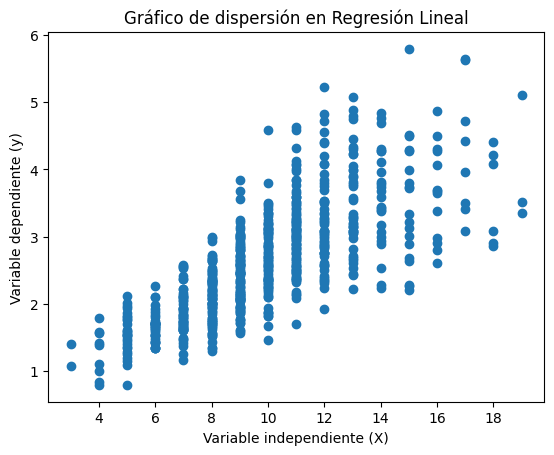

In [ ]:
plt.scatter(df['age'], df['fev'])
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (y)')
plt.title('Gráfico de dispersión en Regresión Lineal')
plt.show()

El FEV sigue una relación creciente con respecto a la edad.

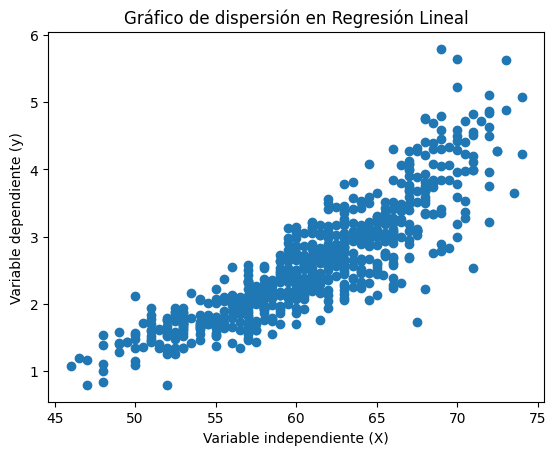

In [ ]:
plt.scatter(df['height'], df['fev'])
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (y)')
plt.title('Gráfico de dispersión en Regresión Lineal')
plt.show()

El FEV tiene una relación creciente con respecto al tamaño en pulgadas
